<a href="https://colab.research.google.com/github/EktaKumari2011/CODSOFT/blob/main/task5_Credit_Card_Fraud_PredictionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Importing dependencies</h1>

In [73]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
#loading dataset
creditCard_data = pd.read_csv('/content/creditcard.csv')

<ipython-input-74-3b31671f0bec>:2: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  creditCard_data = pd.read_csv('/content/creditcard.csv')


In [75]:
#description of dataset
creditCard_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [76]:
creditCard_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33755,37372,0.597155,-1.457940,0.648770,-1.154721,-1.384692,-0.114190,-0.353940,0.077492,1.434997,...,0.266727,0.391858868587825,-0.248812,0.335329,0.164725,-0.063462,0.010369,0.068737,300.00,0.0
33756,37373,-7.504323,-15.633772,-4.215051,1.507090,-5.412604,3.243205,4.422388,-0.423582,0.392031,...,2.323590,-2.53917289990935,-3.736852,-0.792271,-1.694790,-0.463947,-0.703180,0.780931,4476.72,0.0
33757,37373,1.242547,0.010297,-1.206012,0.083576,2.171891,3.391877,-0.417041,0.793206,-0.149793,...,0.031822,-0.0638428726104072,-0.166334,1.008827,0.824605,-0.268009,0.016069,0.019513,28.56,0.0
33758,37373,-1.065865,1.177477,2.083773,1.296198,0.564073,0.295974,0.656915,0.158767,-1.006866,...,-0.157601,-0.518893364163089,-0.140236,-0.022273,0.117122,-0.358995,-0.201863,0.088919,0.00,0.0
33759,37373,-0.302250,0.828254,-0.311542,-1.108255,2.533421,3.274040,0.134693,0.933364,-0.505897,...,-0.314500,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
#dataset insights
creditCard_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33760 entries, 0 to 33759
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    33760 non-null  int64  
 1   V1      33760 non-null  float64
 2   V2      33760 non-null  float64
 3   V3      33760 non-null  float64
 4   V4      33760 non-null  float64
 5   V5      33760 non-null  float64
 6   V6      33760 non-null  float64
 7   V7      33760 non-null  float64
 8   V8      33760 non-null  float64
 9   V9      33760 non-null  float64
 10  V10     33760 non-null  float64
 11  V11     33760 non-null  float64
 12  V12     33760 non-null  float64
 13  V13     33760 non-null  float64
 14  V14     33760 non-null  float64
 15  V15     33760 non-null  float64
 16  V16     33760 non-null  float64
 17  V17     33760 non-null  float64
 18  V18     33760 non-null  float64
 19  V19     33760 non-null  float64
 20  V20     33760 non-null  float64
 21  V21     33760 non-null  float64
 22

In [78]:
#null values
creditCard_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [79]:
#handling missing values of amount column .
#replacing it with mean value
creditCard_data['Amount'].fillna(creditCard_data['Amount'].mean(), inplace=True)

In [80]:
#handling missing value in class column
#replacing the missing values with true
creditCard_data.dropna(subset=['Class'], inplace=True)

In [81]:
creditCard_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<h1>Data visualisation</h1>

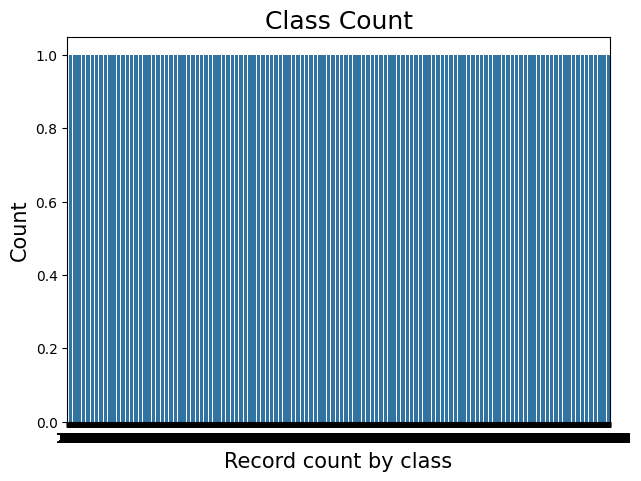

In [82]:
plt.figure(figsize=(7,5))
sns.countplot(creditCard_data['Class'])
plt.title("Class Count", fontsize=18)
plt.xlabel("Record count by class",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

Class
0.0    99.694896
1.0     0.305104
Name: Class, dtype: float64


<Axes: ylabel='Class'>

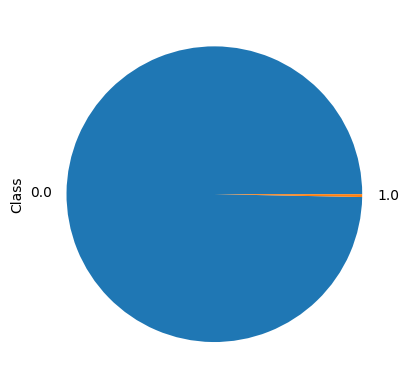

In [83]:
#pie chart
print((creditCard_data.groupby('Class')['Class'].count()/creditCard_data['Class'].count())*100)
((creditCard_data.groupby('Class')['Class'].count()/creditCard_data['Class'].count())*100).plot.pie()

In [84]:
#heatmap
corr = creditCard_data.corr()
corr

<ipython-input-84-b0e80814853e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = creditCard_data.corr()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.017816,-0.107529,-0.065867,-0.033503,-0.075566,-0.019869,-0.010856,0.039393,-0.328317,...,0.014098,0.024000,-0.011084,-0.013278,0.056925,-0.035307,-0.003964,-0.000971,0.069997,-0.012079
V1,0.017816,1.000000,-0.133990,0.312937,-0.104749,0.098165,0.107076,0.182607,-0.098015,-0.030385,...,-0.092081,-0.066833,-0.050639,-0.009858,0.183771,0.025017,-0.143281,0.189871,-0.214837,-0.225919
V2,-0.107529,-0.133990,1.000000,-0.249487,0.120289,-0.133292,-0.021044,-0.055907,0.068811,-0.016393,...,-0.078306,0.032870,-0.002019,-0.023471,-0.095659,-0.049774,0.055877,0.047638,-0.500774,0.205768
V3,-0.065867,0.312937,-0.249487,1.000000,-0.154739,0.312616,0.008044,0.360343,-0.292925,0.167489,...,-0.095805,-0.000013,0.056617,0.030216,-0.188387,0.061514,-0.181277,0.071175,-0.166588,-0.412469
V4,-0.033503,-0.104749,0.120289,-0.154739,1.000000,-0.075003,-0.044101,-0.110834,0.095172,-0.030763,...,0.018350,-0.000966,-0.010681,-0.016966,-0.015852,0.028176,0.066231,-0.036025,0.096631,0.223332
V5,-0.075566,0.098165,-0.133292,0.312616,-0.075003,1.000000,0.093087,0.074511,-0.120081,0.043673,...,-0.000849,-0.053290,0.028322,-0.007450,-0.052389,-0.046990,-0.126481,0.015301,-0.373715,-0.207427
V6,-0.019869,0.107076,-0.021044,0.008044,-0.044101,0.093087,1.000000,0.102175,-0.065968,0.050375,...,-0.012061,0.044955,-0.012064,0.018668,0.059581,0.013457,-0.021567,-0.022680,0.213699,-0.101126
V7,-0.010856,0.182607,-0.055907,0.360343,-0.110834,0.074511,0.102175,1.000000,-0.138626,0.047518,...,0.010966,-0.075327,0.068886,-0.000698,-0.121858,-0.041180,-0.150365,-0.057180,0.337312,-0.331990
V8,0.039393,-0.098015,0.068811,-0.292925,0.095172,-0.120081,-0.065968,-0.138626,1.000000,-0.068505,...,0.062188,-0.128982,-0.056567,0.004776,0.036720,-0.001699,0.056503,0.078879,-0.074457,0.168806
V9,-0.328317,-0.030385,-0.016393,0.167489,-0.030763,0.043673,0.050375,0.047518,-0.068505,1.000000,...,0.015044,-0.024534,-0.033252,0.007100,0.095835,0.078917,-0.053929,-0.060042,-0.022678,-0.144466


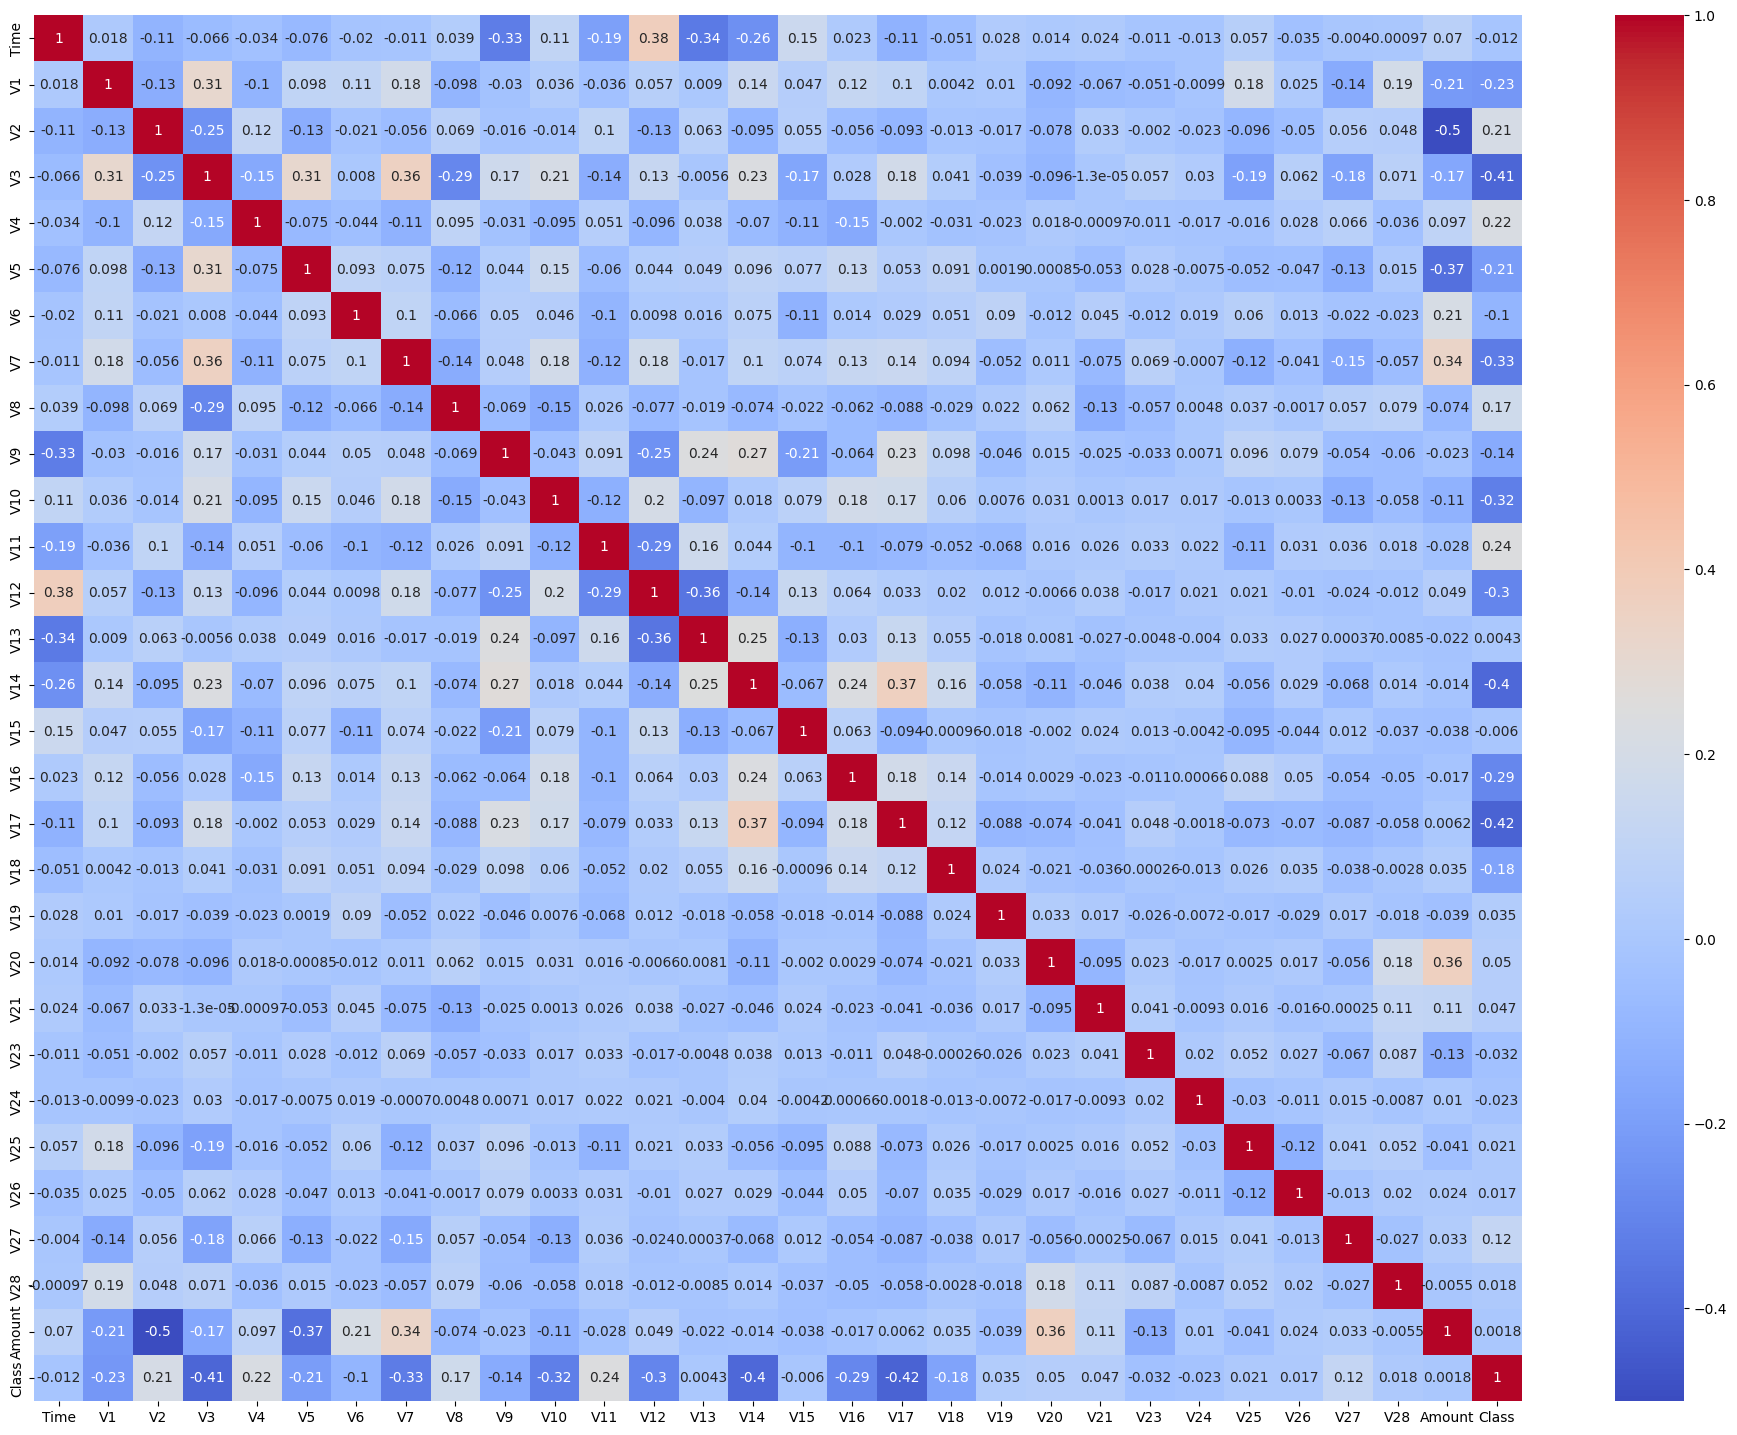

In [85]:
plt.figure(figsize=(24,18))

sns.heatmap(corr,cmap="coolwarm", annot=True)
plt.show()

In [86]:
creditCard_data.Amount.dtype

dtype('float64')

In [87]:
#distribution of legit and fraud trasaction
creditCard_data['Class'].value_counts()

0.0    33656
1.0      103
Name: Class, dtype: int64

<h2>The dataset is unbalanced. so we will seperate 0's and 1's for analysis</h2>

In [88]:
#seperating
true_transaction = creditCard_data[creditCard_data.Class == 0.0]
false_transaction = creditCard_data[creditCard_data.Class == 1.0]

In [89]:
print(true_transaction.shape)
print(false_transaction.shape)

(33656, 31)
(103, 31)


In [90]:
#stats measures
true_transaction.Amount.describe()

count    33656.000000
mean        83.011607
std        227.811004
min          0.000000
25%          6.990000
50%         21.040000
75%         75.000000
max       7879.420000
Name: Amount, dtype: float64

In [91]:
false_transaction.Amount.describe()

count     103.000000
mean       90.471165
std       247.173335
min         0.000000
25%         1.000000
50%         3.760000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [92]:
#comparing true and false transactions
creditCard_data.groupby('Class').mean()

<ipython-input-92-91b2f34d5699>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  creditCard_data.groupby('Class').mean()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V19,V20,V21,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,23194.307464,-0.187654,0.072598,0.753847,0.187759,-0.199393,0.100208,-0.094713,0.020007,0.295446,...,-0.038628,0.043092,-0.033930,-0.041512,0.009386,0.134676,0.021468,0.009748,0.003296,83.011607
1.0,20498.291262,-7.762676,5.838647,-10.957218,5.911555,-5.453798,-2.306085,-7.743100,3.867920,-2.961800,...,0.477900,0.652319,0.628539,-0.362138,-0.234731,0.300023,0.180390,0.822304,0.102481,90.471165


Under sampling the dataset. as the data for prediction is quite less. And prediction on that basis can cause false predictions

Building a sample dataset containing similar distribution of normal transactions and fraudulent transactions

Number of Fraudulent transactions: 94

In [93]:
true_transaction_sample = true_transaction.sample(n=103)

<h1>Concatination of data frames</h1>

In [94]:
new_data = pd.concat([true_transaction_sample, false_transaction], axis = 0 )

In [95]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
19983,30701,-0.521451,0.844192,1.871171,0.348807,0.277466,-0.324011,0.769327,-0.114924,-0.465263,...,-0.253527,-0.663111,-0.110195,0.004265,-0.094188,0.232408,-0.127346,-0.141326,17.99,0.0
11763,20126,0.739116,-0.169930,0.428952,1.688790,-0.396611,-0.633271,0.412955,-0.311531,1.006374,...,0.081792,0.10124,-0.193603,0.578832,0.462378,-0.380200,-0.032971,0.056016,223.80,0.0
20525,31099,0.762265,-0.989307,0.447158,0.454731,-1.202147,-0.678494,-0.050806,-0.117177,0.725779,...,0.072910,-0.262931,-0.209916,0.450163,0.147868,0.989976,-0.110237,0.050732,259.00,0.0
27713,34673,-3.850995,1.513792,0.274849,-1.841109,-1.956256,1.743104,-3.957438,-9.204101,-1.025627,...,-2.092737,1.817469,0.195665,-0.024048,-0.015598,-0.253106,0.244069,-0.085499,139.00,0.0
3528,3014,1.079690,-0.142959,0.580784,0.815225,-0.669470,-0.492123,-0.075113,0.002325,0.229714,...,-0.140653,-0.385901,-0.013811,0.574571,0.368770,0.234444,-0.037142,0.012773,55.97,0.0


In [96]:
new_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
30442,35926,-3.896583,4.518355,-4.454027,5.547453,-4.121459,-1.163407,-6.805053,2.928356,-4.917130,...,1.691042,0.920021,-0.151104,0.011007,0.080303,0.412191,0.635789,0.501050,4.56,1.0
30473,35942,-4.194074,4.382897,-5.118363,4.455230,-4.812621,-1.224645,-7.281328,3.332250,-3.679659,...,1.550473,0.614573,0.028521,0.013704,-0.149512,-0.131687,0.473934,0.473757,14.46,1.0
30496,35953,-4.844372,5.649439,-6.730396,5.252842,-4.409566,-1.740767,-6.311699,3.449167,-5.416284,...,1.194888,-0.845753,0.190674,-0.216443,-0.325033,-0.270328,0.210214,0.391855,111.70,1.0
31002,36170,-5.685013,5.776516,-7.064977,5.902715,-4.715564,-1.755633,-6.958679,3.877795,-5.541529,...,1.128641,-0.96296,-0.110045,-0.177733,-0.089175,-0.049447,0.303445,0.219380,111.70,1.0
33276,37167,-7.923891,-5.198360,-3.000024,4.420666,2.272194,-3.394483,-5.283435,0.131619,0.658176,...,-0.734308,-0.59992625988411,-4.908301,0.410170,-1.167660,0.520508,1.937421,-1.552593,12.31,1.0


In [97]:
new_data['Class'].value_counts()

0.0    103
1.0    103
Name: Class, dtype: int64

In [98]:
new_data.groupby('Class').mean()

<ipython-input-98-16ad5bb0a144>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_data.groupby('Class').mean()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V19,V20,V21,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,23295.126214,0.060003,0.026314,0.673885,0.048441,-0.095892,0.231528,-0.230723,-0.074926,0.246915,...,0.022205,0.019527,-0.154724,0.001662,0.019090,0.166451,-0.031748,0.015011,0.015296,63.391845
1.0,20498.291262,-7.762676,5.838647,-10.957218,5.911555,-5.453798,-2.306085,-7.743100,3.867920,-2.961800,...,0.477900,0.652319,0.628539,-0.362138,-0.234731,0.300023,0.180390,0.822304,0.102481,90.471165


<h1>Splitting data into features and targets</h1>

In [99]:
x = new_data.drop(columns= 'Class', axis=1)
y = new_data['Class']

In [100]:
print(x)

        Time        V1        V2        V3        V4        V5        V6  \
19983  30701 -0.521451  0.844192  1.871171  0.348807  0.277466 -0.324011   
11763  20126  0.739116 -0.169930  0.428952  1.688790 -0.396611 -0.633271   
20525  31099  0.762265 -0.989307  0.447158  0.454731 -1.202147 -0.678494   
27713  34673 -3.850995  1.513792  0.274849 -1.841109 -1.956256  1.743104   
3528    3014  1.079690 -0.142959  0.580784  0.815225 -0.669470 -0.492123   
...      ...       ...       ...       ...       ...       ...       ...   
30442  35926 -3.896583  4.518355 -4.454027  5.547453 -4.121459 -1.163407   
30473  35942 -4.194074  4.382897 -5.118363  4.455230 -4.812621 -1.224645   
30496  35953 -4.844372  5.649439 -6.730396  5.252842 -4.409566 -1.740767   
31002  36170 -5.685013  5.776516 -7.064977  5.902715 -4.715564 -1.755633   
33276  37167 -7.923891 -5.198360 -3.000024  4.420666  2.272194 -3.394483   

             V7        V8        V9  ...       V20       V21  \
19983  0.769327 -0.1149

In [101]:
print(y)

19983    0.0
11763    0.0
20525    0.0
27713    0.0
3528     0.0
        ... 
30442    1.0
30473    1.0
30496    1.0
31002    1.0
33276    1.0
Name: Class, Length: 206, dtype: float64


<h1>Splitting data into training and testing data</h1>

In [102]:
x_train , x_test , y_train, y_test = train_test_split(x,y, test_size =0.2, stratify=y, random_state = 4)

In [103]:
print(x.shape,x_train.shape,x_test.shape)

(206, 30) (164, 30) (42, 30)


<h1>Model training</h1>

 <h3>Logistic regression</h3>

In [104]:
model = LogisticRegression()

In [105]:
#training the logistic regression model with training data
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

<h1>Evaluate the model based on accuracy score</h1>

In [106]:
#accuracy on trainning data
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)

In [107]:
print('Accuracy on Training data: ',training_data_accuracy)

Accuracy on Training data:  0.9817073170731707


In [108]:
#aacuracy on test data
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction,y_test)

In [109]:
print('Accuracy score on test data: ',test_data_accuracy)

Accuracy score on test data:  1.0
